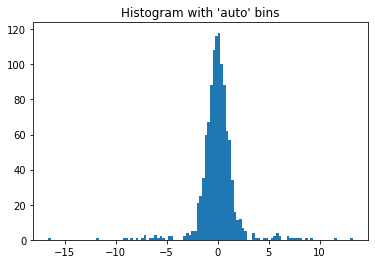

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

rng1 = np.random.RandomState(10) # deterministic random data
ax = np.hstack((rng1.normal(size = 1000),
               rng1.normal(loc = 0,
                         scale = 5,
                         size = 100
                         )
               )
              )
_ = plt.hist(ax, bins = 'auto') # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")

plt.show()

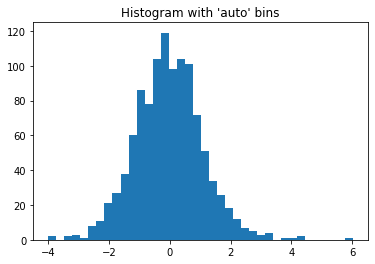

In [3]:
rng2 = np.random.RandomState(2) # deterministic random data, number specifies the random seed

ax = np.hstack((rng2.normal(size = 1000), # gaussian normal distribution
               rng2.normal(loc = 0, # mean of the distribution
                         scale = 2, # stdev of distribution
                         size = 100
                         )
               )
              )
_ = plt.hist(ax, bins = 'auto') # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")

plt.show()

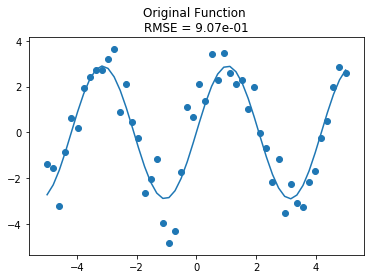

In [5]:
# from here: http://scipy-lectures.org/intro/scipy/auto_examples/plot_curve_fit.html
# import numpy as np
np.random.seed(10)
x_data = np.linspace(-5,5, num=50) # linspace returns even numbers over the interval
y_data = 2.9 * np.sin(1.5*x_data) + np.random.normal(size=50)

core_data = 2.9 * np.sin(1.5*x_data)

# Root Mean Squared value
scores = np.sqrt(np.mean((y_data - core_data)**2))

# plot the data
# import matplotlib.pyplot as plt
plt.figure(figsize = (6,4))
plt.plot(x_data, core_data,
         label = 'Fitted Function')
plt.title("Original Function \nRMSE = {:.2e}".format(scores))
plt.scatter(x_data, y_data)
plt.savefig('000 original.png')

In [6]:
from scipy import optimize
def test_func(x, a, b):
    return a * np.sin(b*x)
params, params_covariance, = optimize.curve_fit(
    test_func, x_data, y_data, p0 = [2,2]
)

# Root Mean Squared value
scores = np.sqrt(np.mean((y_data - test_func(x_data, params[0], params[1]))**2))

print(params)
print()
print(scores)

[3.09109448 1.48926917]

0.8954565505067571


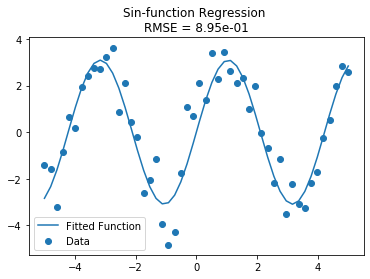

In [7]:
plt.figure(figsize = (6,4))
plt.scatter(x_data, y_data, label = 'Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label = 'Fitted Function')
plt.legend(loc = 'best')
plt.title("Sin-function Regression \nRMSE = {:.2e}".format(scores))
plt.savefig('001 sin curve fit.png')

In [8]:
def test_func(x, a, b):
    return a*x + b
params, params_covariance, = optimize.curve_fit(
    test_func, x_data, y_data, p0 = [2,2]
)

# Root Mean Squared value
scores = np.sqrt(np.mean((y_data - test_func(x_data, params[0], params[1]))**2))

print(params)
print()
print(scores)

[-0.03666456  0.10248622]

2.32397931883322


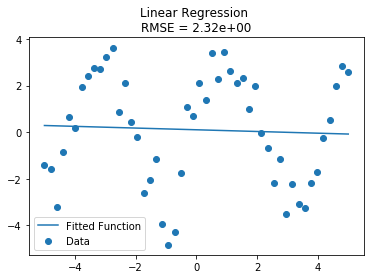

In [9]:
plt.figure(figsize = (6,4))
plt.scatter(x_data, y_data, label = 'Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label = 'Fitted Function')
plt.legend(loc = 'best')
plt.title("Linear Regression \nRMSE = {:.2e}".format(scores))
plt.savefig('002 linear curve fit.png')

In [11]:
def test_func(x, a, b, c, d):
    return a*x*x*x + b*x*x + c*x + d
params, params_covariance, = optimize.curve_fit(
    test_func, x_data, y_data, p0 = [2,2,2,2]
)

# Root Mean Squared value
scores = np.sqrt(np.mean((y_data - test_func(x_data, params[0], params[1], params[2], params[3]))**2))

print(params)
print()
print(scores)

[ 0.02570999 -0.00988791 -0.437841    0.18824876]

2.2649498864804576


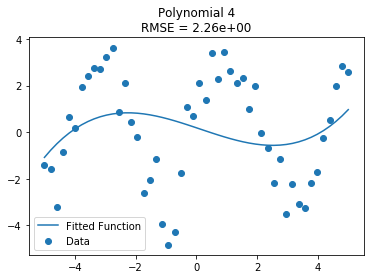

In [12]:
plt.figure(figsize = (6,4))
plt.scatter(x_data, y_data, label = 'Data')
plt.plot(x_data, test_func(x_data, params[0], params[1], params[2], params[3]),
         label = 'Fitted Function')
plt.legend(loc = 'best')
plt.title("Polynomial {}\nRMSE = {:.2e}".format(
    4, scores))
plt.savefig('003 cubit curve fit.png')

In [13]:
def test_func(x, a, b, c, d, e, f):
    return a*x*x*x*x*x + b*x*x*x*x + c*x*x*x + d*x*x + e*x + f
params, params_covariance, = optimize.curve_fit(
    test_func, x_data, y_data, p0 = [2,2,2,2,2,2]
)

# Root Mean Squared value
scores = np.sqrt(
    np.mean((y_data - test_func(x_data, params[0], params[1], params[2], params[3], params[4], params[5]))**2)
)

print(params)
print()
print(scores)

[ 0.01156625  0.00305262 -0.30788541 -0.07788026  1.4167531   0.36483679]

1.6771366018529101


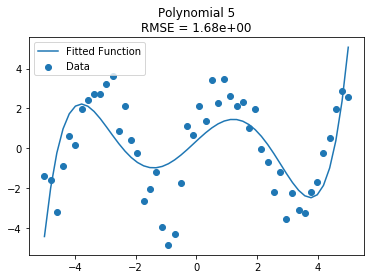

In [15]:
plt.figure(figsize = (6,4))
plt.scatter(x_data, y_data, label = 'Data')
plt.plot(x_data, test_func(x_data, params[0], params[1], params[2], params[3], params[4], params[5]),
         label = 'Fitted Function')
plt.legend(loc = 'best')
plt.title("Polynomial {}\nRMSE = {:.2e}".format(
    5, scores))
plt.savefig('004 5 parameter polynomial curve fit.png')